<a href="https://colab.research.google.com/github/azkbrqlna/2025-AI-Praktikum/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Ekspor Dataset dan Preview

In [97]:
df = pd.read_csv("airbnb.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Info Data

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Missing Values

In [99]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### Data Cleaning

In [101]:
# Konversi kolom 'last_review' ke format datetime, salah format jadi NaT
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# Menghapus entri yang tidak memiliki nama listing (nama properti)
df = df.dropna(subset=['name'])

# Mengisi nama host yang kosong dengan 'Unknown'
df['host_name'] = df['host_name'].fillna('Unknown')

# Mengisi nilai kosong pada 'reviews_per_month' dengan 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Menghapus data duplikat jika ada
df = df.drop_duplicates()

# Menghapus data dengan harga tidak wajar atau jumlah minimum malam terlalu tinggi
df = df[df['price'] > 0]
df = df[df['minimum_nights'] < 365]

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.882600e+04,4.882600e+04,48826.000000,48826.000000,48826.000000,48826.000000,48826.000000,38802,48826.000000,48826.000000,48826.000000
mean,1.902549e+07,6.765784e+07,40.728948,-73.952159,152.653463,6.628907,23.293839,2018-10-04 11:08:02.634915584,1.091905,7.151169,112.668087
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.476202e+06,7.824440e+06,40.690083,-73.983068,69.000000,1.000000,1.000000,2018-07-10 00:00:00,0.040000,1.000000,0.000000
50%,1.969192e+07,3.081175e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.370000,1.000000,45.000000
75%,2.915815e+07,1.074344e+08,40.763130,-73.936273,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.590000,2.000000,226.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,364.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098245e+07,7.863591e+07,0.054532,0.046165,239.906309,13.953648,44.572485,NaN,1.597802,32.975092,131.543501


### Analisis Deskriptif

In [102]:
# Analisis kolom kategorikal
print("\nNeighbourhood Group Distribution:")
print(df['neighbourhood_group'].value_counts())

print("\nRoom Type Distribution:")
print(df['room_type'].value_counts())

# Analisis kolom numerik
print("\nPrice Statistics:")
print(f"Min: {df['price'].min()}")
print(f"Max: {df['price'].max()}")
print(f"Mean: {df['price'].mean():.2f}")
print(f"Median: {df['price'].median()}")
print(f"Std Dev: {df['price'].std():.2f}")

# Menghitung perbandingan harga min dan max
price_range = df['price'].max() - df['price'].min()
print(f"\nPrice Range: {price_range}")


Neighbourhood Group Distribution:
neighbourhood_group
Manhattan        21631
Brooklyn         20073
Queens            5662
Bronx             1088
Staten Island      372
Name: count, dtype: int64

Room Type Distribution:
room_type
Entire home/apt    25373
Private room       22297
Shared room         1156
Name: count, dtype: int64

Price Statistics:
Min: 10
Max: 10000
Mean: 152.65
Median: 106.0
Std Dev: 239.91

Price Range: 9990


---

### Menampilkan Grafik

Text(0, 0.5, 'Frekuensi')

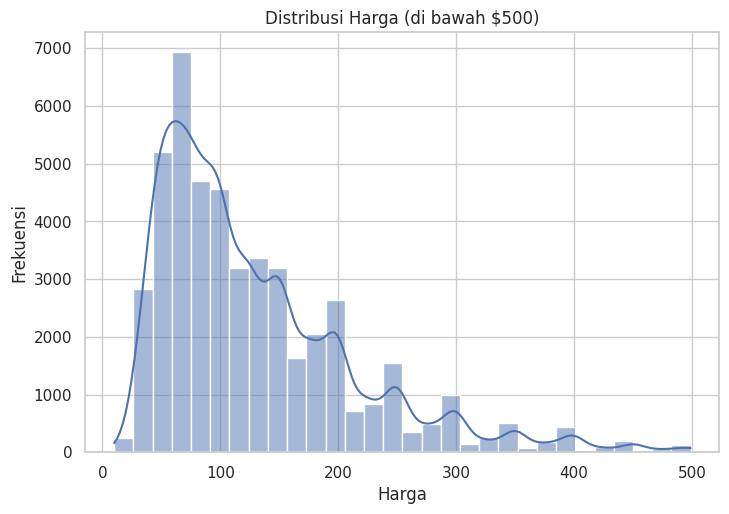

In [103]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
sns.histplot(df[df['price'] < 500]['price'], bins=30, kde=True)
plt.title('Distribusi Harga (di bawah $500)')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Jumlah')

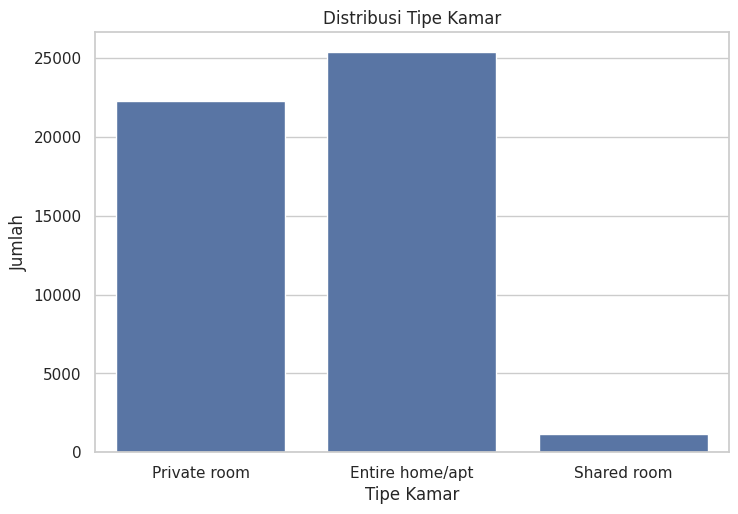

In [105]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='room_type')
plt.title('Distribusi Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah')

Text(0, 0.5, 'Harga Median')

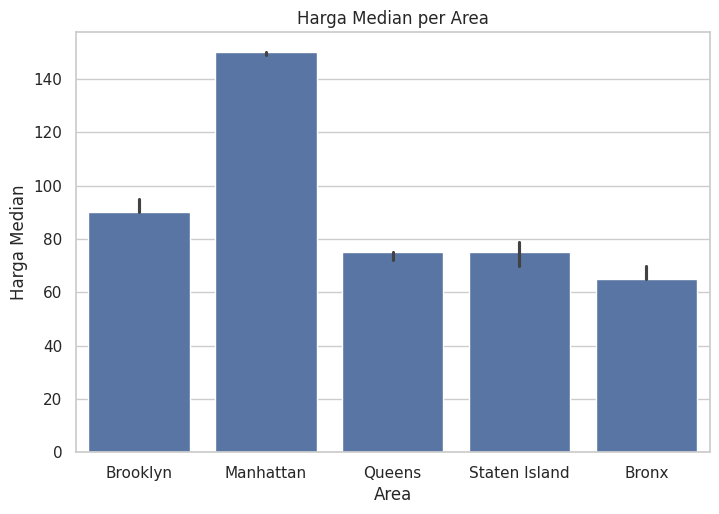

In [106]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=np.median)
plt.title('Harga Median per Area')
plt.xlabel('Area')
plt.ylabel('Harga Median')

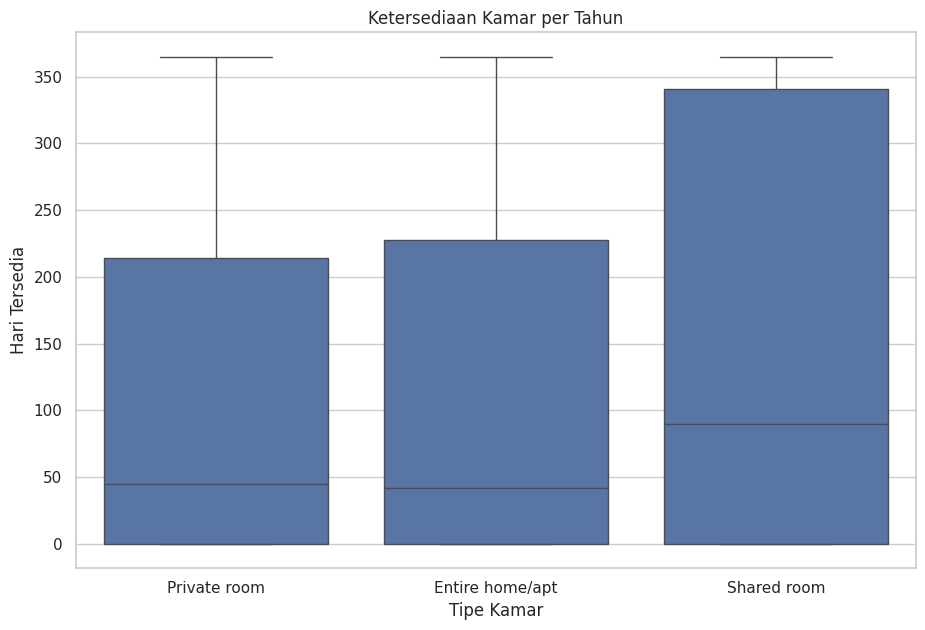

In [107]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='room_type', y='availability_365')
plt.title('Ketersediaan Kamar per Tahun')
plt.xlabel('Tipe Kamar')
plt.ylabel('Hari Tersedia')

plt.tight_layout()
plt.show()

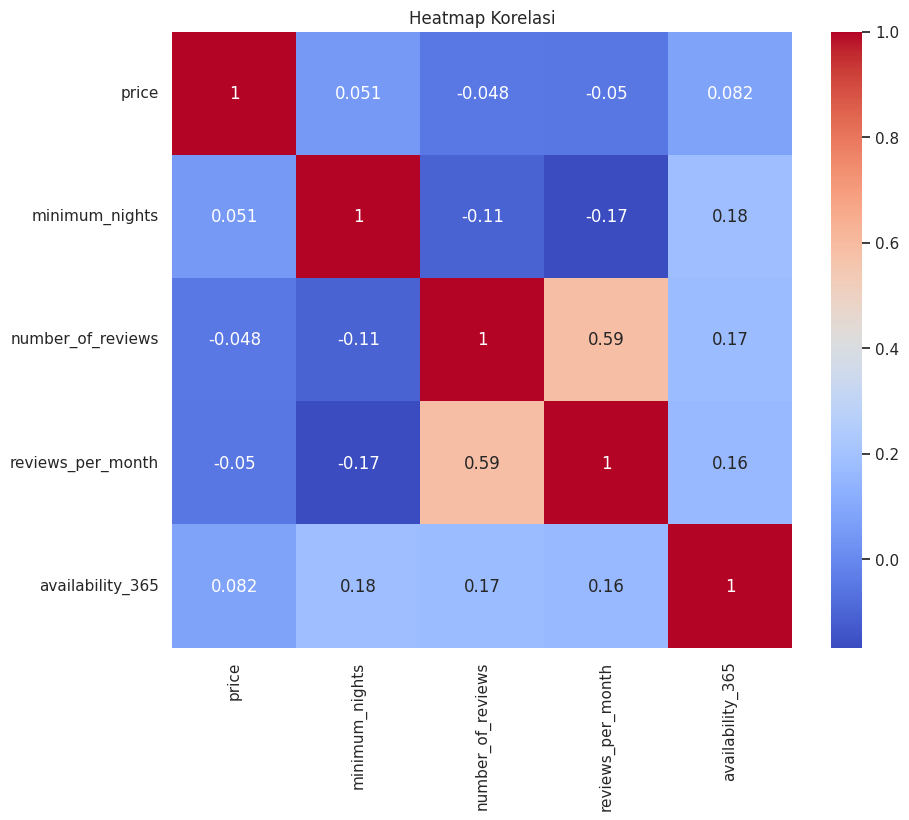

In [109]:
plt.figure(figsize=(10, 8))
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()